# Activity: Hypothesis testing with Python

## **Introduction**


As you've been learning, analysis of variance (commonly called ANOVA) is a group of statistical techniques that test the difference of means among three or more groups. It's a powerful tool for determining whether population means are different across groups and for answering a wide range of business questions.

In this activity, you are a data professional working with historical marketing promotion data. You will use the data to run a one-way ANOVA and a post hoc ANOVA test. Then, you will communicate your results to stakeholders. These experiences will help you make more confident recommendations in a professional setting. 

In your dataset, each row corresponds to an independent marketing promotion, where your business uses TV, social media, radio, and influencer promotions to increase sales. You have previously provided insights about how different promotion types affect sales; now stakeholders want to know if sales are significantly different among various TV and influencer promotion types.

To address this request, a one-way ANOVA test will enable you to determine if there is a statistically significant difference in sales among groups. This includes:
* Using plots and descriptive statistics to select a categorical independent variable
* Creating and fitting a linear regression model with the selected categorical independent variable
* Checking model assumptions
* Performing and interpreting a one-way ANOVA test
* Comparing pairs of groups using an ANOVA post hoc test
* Interpreting model outputs and communicating the results to nontechnical stakeholders

Assumptions of Linear Regression:

1. Linearity: The relationship between the dependent variable and the independent variables is linear. This assumption suggests that the change in the dependent variable is directly proportional to the changes in the independent variables, holding other variables constant.


2. Independence: The observations in the dataset are assumed to be independent of each other. This assumption ensures that there should be no correlation or dependence between the residuals or errors of the model.


3. Homoscedasticity: The variance of the errors or residuals is constant across all levels of the independent variables. Homoscedasticity ensures that the spread or dispersion of the residuals should remain consistent along the range of the independent variables.


4. Normality: The errors or residuals of the model are normally distributed. This assumption states that the distribution of the residuals follows a bell-shaped curve, with a mean of zero. Normality is important for hypothesis testing, confidence intervals, and other statistical inferences based on the model.

It is important to check and validate these assumptions to ensure the validity and reliability of the linear regression model.


## **Step 1: Imports** 


Import pandas, pyplot from matplotlib, seaborn, api from statsmodels, ols from statsmodels.formula.api, and pairwise_tukeyhsd from statsmodels.stats.multicomp.

In [2]:
# Import libraries and packages.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

`Pandas` was used to load the dataset `marketing_sales_data.csv` as `data`, now display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ### 
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows.

### YOUR CODE HERE ### 
data.head(5)


,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


The features in the data are:
* TV promotion budget (in Low, Medium, and High categories)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in Mega, Macro, Nano, and Micro categories)

**Question:** Why is it useful to perform exploratory data analysis before constructing a linear regression model?

[Write your response here. Double-click (or enter) to edit.]

## **Step 2: Data exploration** 


First, use a boxplot to determine how `Sales` vary based on the `TV` promotion budget category.

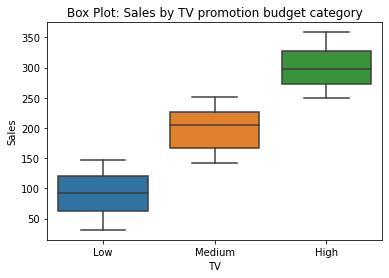

In [4]:
# Create a boxplot with TV and Sales.

### YOUR CODE HERE ### 
sns.boxplot(x = "TV", y = "Sales", data = data)
plt.title("Box Plot: Sales by TV promotion budget category")
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is a function in the `seaborn` library that creates a boxplot showing the distribution of a variable across multiple groups.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `boxplot()` function from `seaborn`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `TV` as the `x` argument, `Sales` as the `y` argument, and `data` as the `data` argument.

</details>

**Question:** Is there variation in `Sales` based off the `TV` promotion budget?

[Write your response here. Double-click (or enter) to edit.]

Now, use a boxplot to determine how `Sales` vary based on the `Influencer` size category.

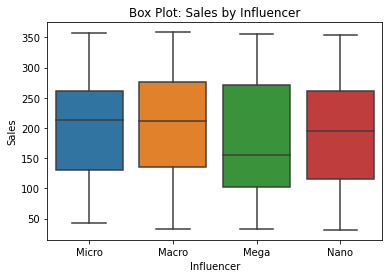

In [5]:
# Create a boxplot with Influencer and Sales.

### YOUR CODE HERE ### 
sns.boxplot(x = "Influencer", y = "Sales", data = data)
plt.title("Box Plot: Sales by Influencer")
plt.show()


**Question:** Is there variation in `Sales` based off the `Influencer` size?

The variation does not seems to be significant 

### Remove missing data

You may recall from prior labs that this dataset contains rows with missing values. To correct this, drop these rows. Then, confirm the data contains no missing values.

In [6]:
# Drop rows that contain missing data and update the DataFrame.

### YOUR CODE HERE ### 
data = data.dropna(axis=0)

# Confirm the data contains no missing values.

### YOUR CODE HERE ### 
data.isna().sum()


TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is a `pandas` function that removes missing values.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `dropna()` function removes missing values from an object (e.g., DataFrame).

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Verify the data is updated properly after the rows containing missing data are dropped.

</details>

## **Step 3: Model building** 


Fit a linear regression model that predicts `Sales` using one of the independent categorical variables in `data`. Refer to your previous code for defining and fitting a linear regression model.

In [7]:
# Define the OLS formula.OLS stands for Ordinary Least Squares
#which is a statistical method used for estimating the parameters in a linear regression model.
ols_formula = "Sales ~ C(TV)"

# Create an OLS model.
OLS = ols(formula = ols_formula, data = data)

# Fit the model.
model = OLS.fit()

# Save the results summary.
model_results = model.summary()

# Display the model results.
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Sat, 15 Jul 2023   Prob (F-statistic):          8.81e-256
Time:                        07:52:18   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to code you've written to fit linear regression models.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `ols()` function from `statsmodels.formula.api`, which creates a model from a formula and DataFrame, to create an OLS model.

</details>


<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `C()` around the variable name in the ols formula to indicate a variable is categorical.
    
Be sure the variable string names exactly match the column names in `data`.

</details>

**Question:** Which categorical variable did you choose for the model? Why?

TV is the categorical variable as it shows more variations with Sales than Influencer

### Check model assumptions

Now, check the four linear regression assumptions are upheld for your model.

**Question:** Is the linearity assumption met?

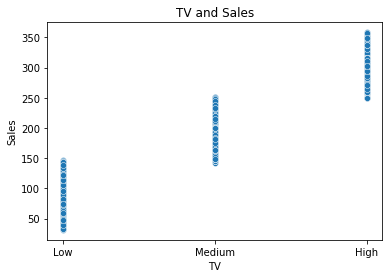

In [8]:
# Create a scatterplot for each independent variable and the dependent variable.

### YOUR CODE HERE ### 

# Create a scatterplot between Radio and Sales.
sns.scatterplot(x = data['TV'], y = data['Sales'])

# Set the title of the first plot.
plt.title("TV and Sales")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.show()

Acccording to the scatterplot, the model does not include any continuous independent variable; straight line. Therefore, there is no need of an assumption. 
The observations are independent of each other. The promos of individual does not affect one another, thus independence assumption is not violated.

Next, verify that the normality assumption is upheld for the model.

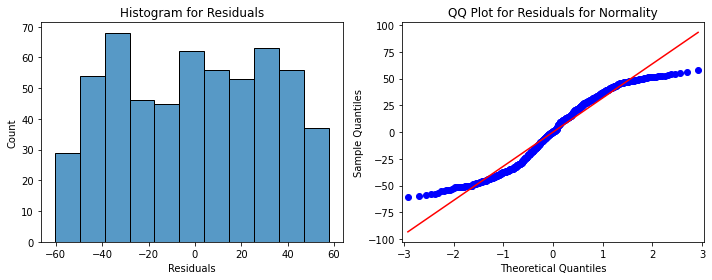

In [9]:
# Calculate the residuals.
residuals = model.resid

# Create a histogram with the residuals. 
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel('Residuals')
axes[0].set_title('Histogram for Residuals')
# Create a QQ plot of the residuals.

sm.qqplot(residuals, line='s', ax=axes[1])
axes[1].set_title('QQ Plot for Residuals for Normality')

plt.tight_layout()
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the residuals from the fit model object.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.resid` to get the residuals from a fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

For the histogram, pass the residuals as the first argument in the `seaborn` `histplot()` function.
    
For the QQ-plot, pass the residuals as the first argument in the `statsmodels` `qqplot()` function.

</details>

**Question:** Is the normality assumption met?

The QQ plot above demonstrates that it does not meet the normality assumption when we use 'TV' as the independent varaible predicting 'Sales' because the distribution of points in qq plot shows s curve rather than a straight line.

Now, verify the constant variance (homoscedasticity) assumption is met for this model.

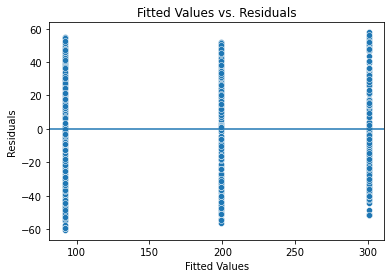

In [10]:
# Create a scatter plot with the fitted values from the model and the residuals.
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)
fig.set_xlabel('Fitted Values')
fig.set_ylabel('Residuals')
fig.set_title("Fitted Values vs. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.
fig.axhline(0)
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the fitted values from the model object fit earlier.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.fittedvalues` to get the fitted values from the fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>


Call the `scatterplot()` function from the `seaborn` library and pass in the fitted values and residuals.
    
Add a line to a figure using the `axline()` function.

</details>

**Question:** Is the constant variance (homoscedasticity) assumption met?

The residuals distributed evenly over the fitted values, thus validating that the constant variance assumption is met.

## **Step 4: Results and evaluation** 

First, display the OLS regression results.

In [11]:
# Display the model results summary.

### YOUR CODE HERE ### 
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Sat, 15 Jul 2023   Prob (F-statistic):          8.81e-256
Time:                        07:52:18   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** What is your interpretation of the model's R-squared?

R-squared value of 0.874 shows that the model could explain 87.4% of the variation in Sales using TV, thus it is an effective model to do prediction.

**Question:** What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?

Default TV is 'High', we can see that when it changes to 'Medium' the Sales might decrease by 101.5061, following by 'Low', the Sales decreases by 208.8133.

The p-values of all coefficient is 0, which is lesser than 0.05(common significance level, denoted as alpha) meaning that there is 95% chance the interval [-215.353 	-202.274] contains the true parameter of the slope of  "C(TV)[T.Low]" and [-108.038 	-94.975] contains true parameter of the slope of "C(TV)[T.Medium]"

When p-value is lesser than signficance level, reject null hypothesis and support alternative hypothesis.

**Question:** Do you think your model could be improved? Why or why not? How?



With more granular view of the TV, the model could be improved such as additional categories for TV promotion budgets. Additional variables can increaes the model performance as well.


### Perform a one-way ANOVA test

With the model fit, run a one-way ANOVA test to determine whether there is a statistically significant difference in `Sales` among groups. 

In [12]:
# Create an one-way ANOVA table for the fit model.
anova_result = sm.stats.anova_lm(model, type = 1)
print("Anova Result: \n", anova_result)

p_value = anova_result['PR(>F)'][0]
print("\nP-value:", p_value)

Anova Result: 
              df        sum_sq       mean_sq            F         PR(>F)
C(TV)       2.0  4.052692e+06  2.026346e+06  1971.455737  8.805550e-256
Residual  566.0  5.817589e+05  1.027843e+03          NaN            NaN

P-value: 8.80555037065864e-256


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Review what you've learned about how to perform a one-way ANOVA test.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

There is a function in `statsmodels.api` (i.e. `sm`) that peforms an ANOVA test for a fit linear model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `anova_lm()` function from `sm.stats`. Specify the type of ANOVA test (for example, one-way or two-way), using the `typ` parameter.
   

</details>

**Question:** What are the null and alternative hypotheses for the ANOVA test?



    Null Hypothesis: There is no difference in Sales based on TV promotion budget
    Alternative Hypothesis: There is difference in Sales based on TV promotion budget.



**Question:** What is your conclusion from the one-way ANOVA test?



p-value of 8.8e-256, which is less than 0.05, shows thats we reject the null hypotheses.


**Question:** What did the ANOVA test tell you?



We reject the null hypothesis and there is a statitically significant difference in Sales among TV groups.


### Perform an ANOVA post hoc test

If you have significant results from the one-way ANOVA test, you can apply ANOVA post hoc tests such as the Tukey’s HSD post hoc test. 

Run the Tukey’s HSD post hoc test to compare if there is a significant difference between each pair of categories for TV.

In [13]:
# Perform the Tukey's HSD post hoc test.

### YOUR CODE HERE ### 
tukey_oneway = pairwise_tukeyhsd(endog = data['Sales'], groups = data['TV'])
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-208.8133,0.001,-216.637,-200.9896,True
High,Medium,-101.5061,0.001,-109.3204,-93.6918,True
Low,Medium,107.3072,0.001,99.7063,114.908,True


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Review what you've learned about how to perform a Tukey's HSD post hoc test.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `pairwise_tukeyhsd()` function from `statsmodels.stats.multicomp`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

The `endog` argument in `pairwise_tukeyhsd` indicates which variable is being compared across groups (i.e., `Sales`). The `groups` argument in `pairwise_tukeyhsd` tells the function which variable holds the group you’re interested in reviewing.

</details>

**Question:** What is your interpretation of the Tukey HSD test?



All pairwise comparisons show that there are statistically significant difference in Sales when we change from 'High' to 'Low', "High" to "Medium", and "Low to Medium".


**Question:** What did the post hoc tell you?**



A post hoc test was conducted to determine which TV groups are different and how many are different from each other. This provides more detail than the one-way ANOVA results, which can at most determine that at least one group is different. Further, using the Tukey HSD controls for the increasing probability of incorrectly rejecting a null hypothesis from peforming multiple tests.

The results were that Sales is not the same between any pair of TV groups.


#### **Reference**
[Saragih, H.S. *Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data)

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.